# Anwendungsübung zur Rekursion

In diesem Notebook soll eine graphische Anwendung einer rekursiven Funktion
implementiert werden. Als Grafiklibrary wird PyTamaro verwendet. In der
folgenden Code Zelle werden die erforderlichen Funktionen geladen.

In [2]:
# Import der erforderlichen PyTamaro Funktionen
from pytamaro import (
    rectangle, Graphic, Empty,
    black,
    pin, bottom_left, bottom_right, top_left, top_right, bottom_center,
    rotate, graphic_height, overlay,
    show_graphic, save_graphic,
)

from pytamaro.de import kombiniere

Im folgenden soll es darum gehen diese Scheneeflocke

![Schneeflocke](snwo_flake.svg)

aus Elementen, wie dem folgenden

![Basiselement](basiselement.svg) 

zusammenzubauen.

Dabei ist die Grundkomponente offensichtlich eine kurze Gerade.

In [3]:
def draw_line(length: float) -> Graphic:
    width = length * 0.075
    return rectangle(length, width, black)

show_graphic(draw_line(50))

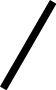

In [4]:
testline = draw_line(100)
show_graphic(rotate(60, testline))

Aus dieser kurzen Geraden, kann ein einzelner Zacken zusammengebaut werden.

In [5]:
def compose_element(element: Graphic) -> Graphic:
    first_quarter = pin(bottom_right, element)
    second_quarter = pin(bottom_left, rotate(60, element))
    half = kombiniere(first_quarter, second_quarter)
    third_quarter = pin(bottom_left, rotate(-60, element))
    half = pin(bottom_right, half)
    three_quarter = kombiniere(half, third_quarter)
    fourth_quarter = pin(bottom_left, element)
    three_quarter = pin(bottom_right, three_quarter)
    return kombiniere(three_quarter, fourth_quarter)

basiselement = compose_element(testline)
save_graphic('basiselement.svg', basiselement)

Aus diesem einzelnen Zacken ist als nächstes ein fein gezahnte Element zu bauen.
Der Funktion soll als Argument die Rekutsionstiefe übergeben werden. Die vorher
programmierten Funktionen können als Hilfsfunktionen aufgerufen werden.

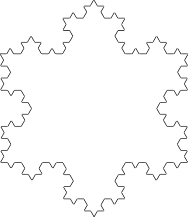

In [ ]:
def draw_zahnung(n: int, m = 1) -> Graphic:
    BASE_LENGTH = 100
    if n == 1:
        part = draw_line(BASE_LENGTH / (m**2.5))
        element = compose_element(part)
        return element
    else:
        m += 1        
        return compose_element(draw_zahnung(n-1, m))
    
top_side = draw_zahnung(3)
right_side = rotate(240, top_side)
left_side = rotate(120, top_side)
top_side = pin(bottom_left, top_side)
left_side = pin(top_left, left_side)
stern = kombiniere(top_side, left_side)
stern = pin(bottom_center, stern)
right_side = pin(bottom_left, right_side)
stern = kombiniere(stern, right_side)
show_graphic(stern)
x = graphic_height(stern)
show_graphic(draw_line(x))
        

Die so gezeichnete gezahnte Linie bildet die Basis einer Schneeflocke.
Implementieren Sie eine Funktion zum zeichnen einer Schneeflocke. Der Funktion
soll die Rekursionstiefe als Argument übergeben werden können.

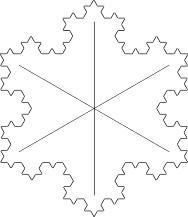

In [58]:
def create_snow_flake(n: int) -> Graphic:
    top_side = hilbert(3)
    right_side = rotate(240, top_side)
    left_side = rotate(120, top_side)
    top_side = pin(bottom_left, top_side)
    left_side = pin(top_left, left_side)
    stern = kombiniere(top_side, left_side)
    stern = pin(bottom_center, stern)
    right_side = pin(bottom_left, right_side)
    stern = kombiniere(stern, right_side)
    
    spine_length = graphic_height(stern) * 0.8
    spine = rectangle((spine_length * 0.005/n), spine_length, black)
    for i in range(0,180,60):
        spine = overlay(spine, rotate(i, spine))
        
    stern = overlay(spine, stern)
        
    return stern

snow_flake = create_snow_flake(4)
save_graphic('snwo_flake.svg', snow_flake)

show_graphic(snow_flake)